# Additive model

I implemented the additive model described in the [GCTA](http://cnsgenomics.com/software/gcta/Simu.html). The phenotype or individual *j*, *y<sub>j</sub>*, is:

$$ y_j = \sum\nolimits_i w_{ij} u_i + e_j$$

Where:


- The weight w<sub>ij</sub> is $$ w_{ij} = \frac{x_{ij} - 2p_i}{\sqrt{2p_i(1 - p_i)}}$$ where
    - x<sub>ij</sub> is the number of reference alleles for the i-th causal variant of the j-th individual.
    - p<sub>i</sub> is the frequency of the i-th causal variant.
- The allelic effect of the i-th causal variant u<sub>i</sub> in arbitrary units.
- e<sub>j</sub> is the residual effect, the proportion of the trait not attributable to the genotype. It depends on heritability. We generate it from a normal distribution with mean of 0 and variance of $$ \frac{1}{h^2 - 1} var(\sum\nolimits_i w_{ij} u_i)$$

    (We take the variance of the genetic effect and add the proportion that is not due to it.) When all variance is due to genetics (h<sup>2</sup> = 1), e<sub>j</sub> = 0 for any case.

# Weight

Warning message:
“Removed 1 rows containing missing values (geom_point).”

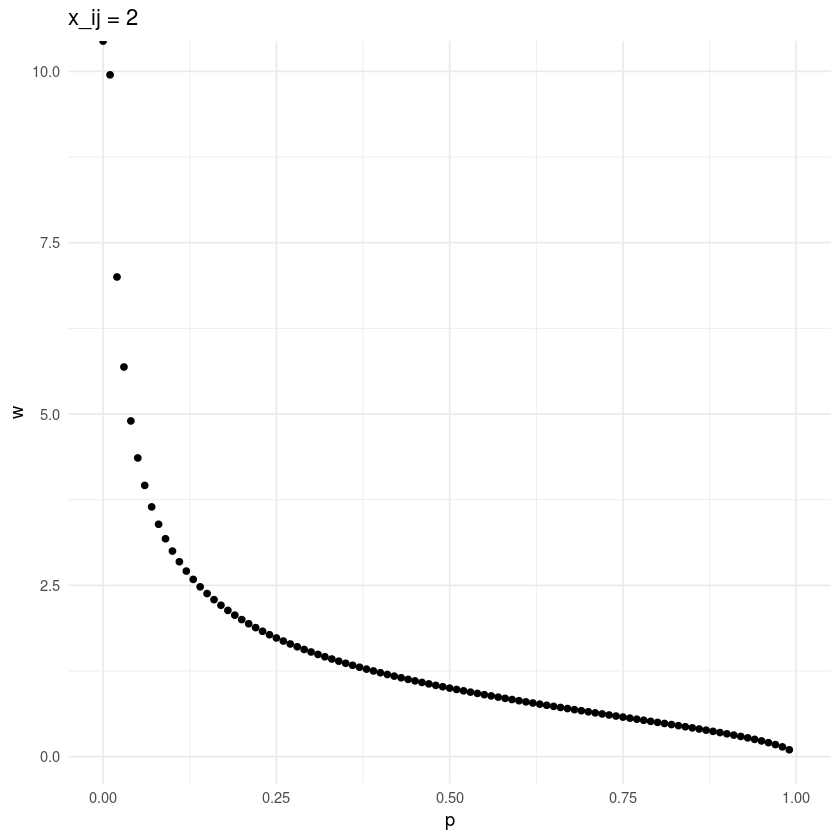

In [11]:
library(ggplot2)

getW <- function(x, p){
    (x-2*p)/(2*sqrt(p*(1-p)))
}

# get 100 frequencies of the causal allele
w <- data.frame(p = seq(0,1,0.01))
w$x2 <- getW(2, w$p)
w$x1 <- getW(1, w$p)
w$x0 <- getW(0, w$p)

ggplot(w, aes(x = p, y = x2)) + 
    geom_point() +
    theme_minimal() +
    labs(y = "w", title = "x_ij = 2")

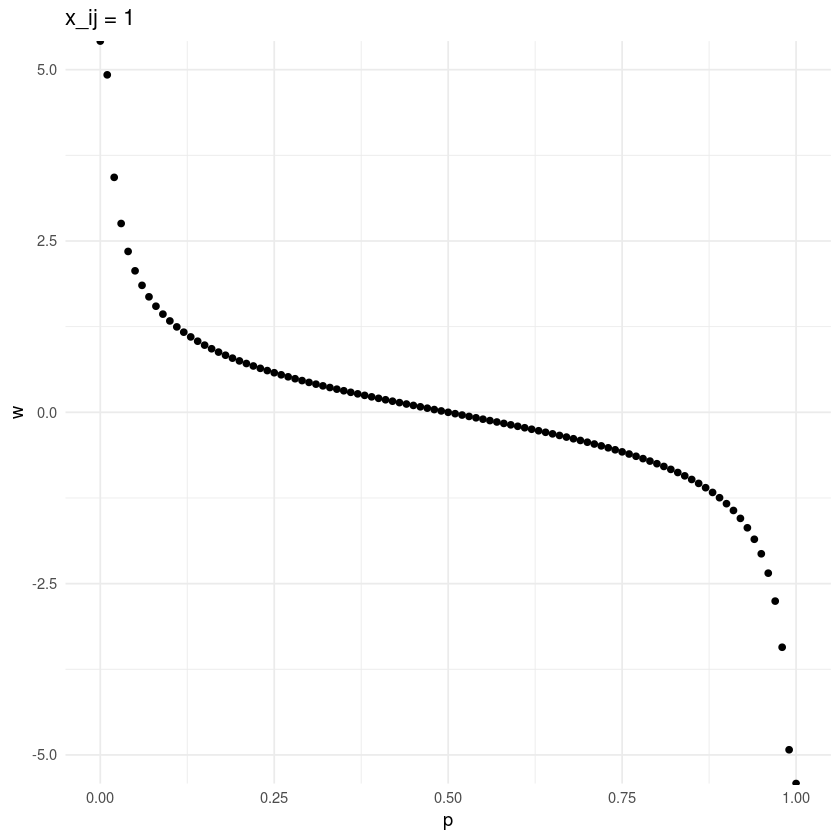

In [13]:
ggplot(w, aes(x = p, y = x1)) + 
    geom_point() +
    theme_minimal() +
    labs(y = "w", title = "x_ij = 1")

Warning message:
“Removed 1 rows containing missing values (geom_point).”

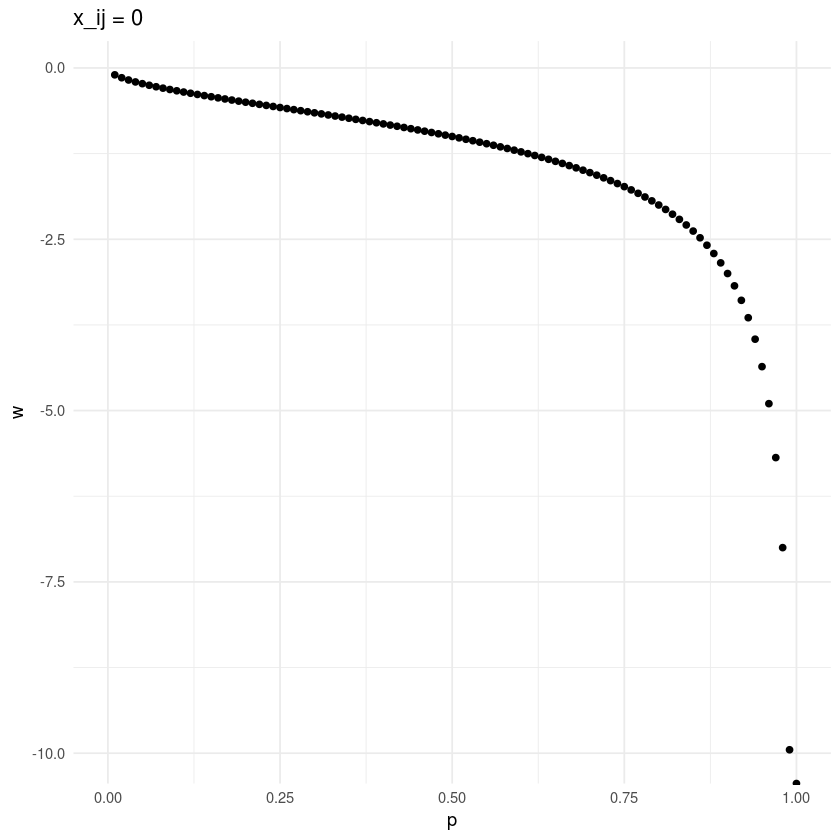

In [14]:
ggplot(w, aes(x = p, y = x0)) + 
    geom_point() +
    theme_minimal() +
    labs(y = "w", title = "x_ij = 0")

The rarer an allele is, the stronger the effect it produces is. It follows a sigmoid shape.